In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
from pandas.io import sql
import sqlite3

In [2]:
reviews_df = pd.read_csv("/Users/benstan/Documents/Job Search 2016/dropbox_case/charlotte_review.csv")
people_df = pd.read_csv("/Users/benstan/Documents/Job Search 2016/dropbox_case/charlotte_reviewer.csv")
biz_df = pd.read_csv("/Users/benstan/Documents/Job Search 2016/dropbox_case/charlotte_business.csv")
YelpData = pd.read_csv("/Users/benstan/Documents/Job Search 2016/dropbox_case/charlotte_data_joined.csv")

### Step 1: Descriptive analysis of business data

In [3]:
biz_df.describe()

,business_latitude,business_longitude,business_review_count,business_stars,business_PriceRange
count,1381.000000,1381.000000,1381.000000,1381.000000,1318.000000
mean,35.195905,-80.833642,41.797972,3.455105,1.536419
std,0.079646,0.060150,60.637403,0.704909,0.585676
min,35.022629,-81.005212,3.000000,1.000000,1.000000
25%,35.145939,-80.858623,8.000000,3.000000,1.000000
50%,35.207797,-80.841644,19.000000,3.500000,1.000000
75%,35.229054,-80.795903,51.000000,4.000000,2.000000
max,35.384064,-80.654628,762.000000,5.000000,4.000000


In [4]:
print biz_df.shape
biz_df.set_index('business_id',inplace=True)
biz_df.head()

(1381, 23)


,business_city,business_full_address,business_latitude,business_longitude,business_name,business_review_count,business_stars,business_state,business_Take-out,business_Alcohol,business_NoiseLevel,business_Attire,business_Delivery,business_HasTV,business_TakesReservations,business_WheelchairAccessible,business_WaiterService,business_AcceptsCreditCards,business_GoodforKids,business_GoodForGroups,business_PriceRange,business_categories
business_id,,,,,,,,,,,,,,,,,,,,,,
Gw5POFxBRoJxN_ZYhk6lgQ,Charlotte,8706 Pineville-Matthews Road\nSuite 100\nCharl...,35.089035,-80.867055,Bruegger's Bagels,9,4.0,NC,True,none,average,casual,False,False,False,True,False,True,True,True,2,"[Food, Sandwiches, Bagels, Breakfast & Brunch,..."
MMgjU4K0D9RLsb7BWEic4g,Charlotte,"8510 Park Rd\nCharlotte, NC 28210",35.117183,-80.857545,Domino's Pizza,4,4.5,NC,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"[Sandwiches, Pizza, Chicken Wings, Restaurants]"
LT0AgHTpDifuHSXgyLmJwg,Charlotte,"309 W 4th St\nCharlotte, NC 28202",35.228193,-80.846592,Green's Lunch,32,3.5,NC,True,none,average,casual,False,False,False,True,False,True,True,True,1,"[Hot Dogs, Restaurants]"
USdRzNk14UdjZWFgBJb0wA,Charlotte,"511 N Church St\nFourth Ward\nCharlotte, NC 28202",35.231684,-80.839638,McNinch House Restaurant,25,4.5,NC,False,full_bar,quiet,formal,False,False,True,NaN,True,True,False,False,4,"[American (New), Southern, French, Restaurants]"
ePP0Eqz8JKSbtdt2phiB4A,Charlotte,"401 W 9th St\nFourth Ward\nCharlotte, NC 28202",35.233610,-80.840783,Alexander Michael's,175,4.0,NC,True,full_bar,average,casual,False,True,False,False,True,True,False,True,2,"[Cajun/Creole, American (Traditional), Bars, P..."


In [5]:
biz_df.isnull().sum() #Many null values in the 'additional details' fields for the restaurants

business_city                      0
business_full_address              0
business_latitude                  0
business_longitude                 0
business_name                      0
business_review_count              0
business_stars                     0
business_state                     0
business_Take-out                 55
business_Alcohol                 187
business_NoiseLevel              209
business_Attire                   78
business_Delivery                 89
business_HasTV                   142
business_TakesReservations        71
business_WheelchairAccessible    677
business_WaiterService           160
business_AcceptsCreditCards       59
business_GoodforKids              72
business_GoodForGroups            65
business_PriceRange               63
business_categories                0
dtype: int64

In [6]:
biz_df.dropna().shape # Over half of the data set has a null value

(635, 22)

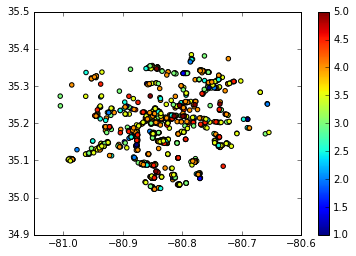

In [8]:
plt.scatter(biz_df['business_longitude'],biz_df['business_latitude'],c=biz_df['business_stars'])
plt.colorbar()

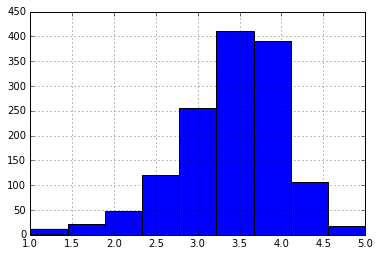

In [9]:
biz_df['business_stars'].hist(bins=9)

In [10]:
start_date_yelp = reviews_df[["business_id","review_date"]].groupby("business_id").min().copy()

In [11]:
biz_df = biz_df.join(start_date_yelp)
biz_df['on_yelp_since'] = pd.to_datetime(biz_df['review_date'])
biz_df['current_date']=pd.to_datetime("2015-01-08") #Date of latest review
biz_df['months_on_yelp'] = ((biz_df['current_date'] - biz_df['on_yelp_since'])/np.timedelta64(1, 'M')).astype(float)
biz_df['reviews_per_month'] = biz_df['business_review_count']/biz_df['months_on_yelp']

In [12]:
for i in ['current_date','on_yelp_since','review_date']:
    del biz_df[i]

In [13]:
biz_df['reviews_per_year'] = biz_df['reviews_per_month']*12

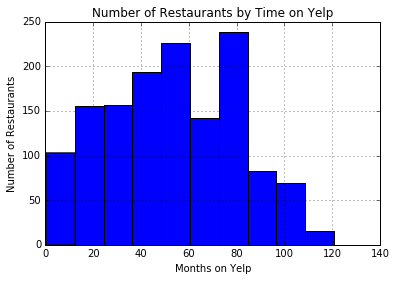

In [14]:
months_hist = biz_df['months_on_yelp'].hist()
months_hist.set_xlabel('Months on Yelp')
months_hist.set_ylabel('Number of Restaurants')
months_hist.set_title('Number of Restaurants by Time on Yelp')

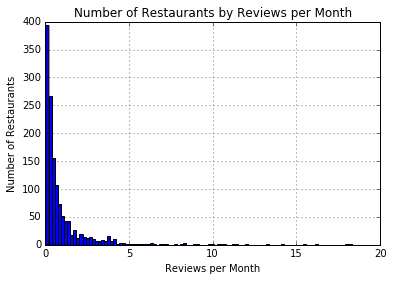

In [71]:
review_hist = biz_df['reviews_per_month'].hist(bins=100)
review_hist.set_xlabel('Reviews per Month')
review_hist.set_ylabel('Number of Restaurants')
review_hist.set_title('Number of Restaurants by Reviews per Month')

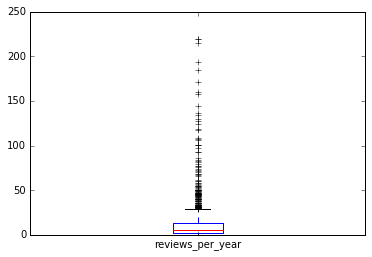

In [46]:
biz_df['reviews_per_year'].plot(kind='box')

In [38]:
biz_df.corr()

,business_latitude,business_longitude,business_review_count,business_stars,business_PriceRange,months_on_yelp,reviews_per_month,reviews_per_year
business_latitude,1.000000,0.215515,-0.013811,-0.003709,-0.065143,0.006550,-0.026434,-0.026434
business_longitude,0.215515,1.000000,-0.019010,0.063476,0.015303,0.054817,-0.016773,-0.016773
business_review_count,-0.013811,-0.019010,1.000000,0.235096,0.338611,0.283568,0.522382,0.522382
business_stars,-0.003709,0.063476,0.235096,1.000000,0.084705,0.029359,0.198368,0.198368
business_PriceRange,-0.065143,0.015303,0.338611,0.084705,1.000000,0.086388,0.276847,0.276847
months_on_yelp,0.006550,0.054817,0.283568,0.029359,0.086388,1.000000,-0.280122,-0.280122
reviews_per_month,-0.026434,-0.016773,0.522382,0.198368,0.276847,-0.280122,1.000000,1.000000
reviews_per_year,-0.026434,-0.016773,0.522382,0.198368,0.276847,-0.280122,1.000000,1.000000


In [74]:
biz_df.describe()

,business_latitude,business_longitude,business_review_count,business_stars,business_PriceRange,months_on_yelp,reviews_per_month,reviews_per_year
count,1381.000000,1381.000000,1381.000000,1381.000000,1318.000000,1381.000000,1381.000000,1381.000000
mean,35.195905,-80.833642,41.797972,3.455105,1.536419,52.831843,1.057796,12.693548
std,0.079646,0.060150,60.637403,0.704909,0.585676,26.925504,1.869100,22.429199
min,35.022629,-81.005212,3.000000,1.000000,1.000000,0.328549,0.031443,0.377317
25%,35.145939,-80.858623,8.000000,3.000000,1.000000,31.606398,0.191427,2.297123
50%,35.207797,-80.841644,19.000000,3.500000,1.000000,51.746442,0.426353,5.116237
75%,35.229054,-80.795903,51.000000,4.000000,2.000000,75.040555,1.077139,12.925670
max,35.384064,-80.654628,762.000000,5.000000,4.000000,120.643134,18.292869,219.514432


Slight correlation exists between number of stars and reviews per month (0.20) 

Correlation exists between price range and reviews per month (0.38)

### Step 2: Perform regression on number of reviews per month

In [47]:
X = biz_df.dropna().copy()

In [48]:
Q1 = X['reviews_per_year'].quantile(.25)  #Here is first Quartilefor hp
Q3 = X['reviews_per_year'].quantile(.75)  #Here is third Quartile for hp
IQR = Q3 - Q1

In [49]:
X.drop(X[(X['reviews_per_year'] > Q3 + 1.5*IQR) |
                     (X['reviews_per_year'] < Q1 - 1.5*IQR) ].index
                        , inplace = True)
y = X['reviews_per_year']
del X['reviews_per_year']
for i in ['business_full_address','business_latitude','business_longitude','business_name','business_state','business_categories','business_city','business_review_count','reviews_per_month']:
    del X[i]

In [50]:
X['business_Take-out'] = X['business_Take-out'].map({True:1,False:0})
X['business_Delivery'] = X['business_Delivery'].map({True:1,False:0})
X['business_HasTV'] = X['business_HasTV'].map({True:1,False:0})
X['business_TakesReservations'] = X['business_TakesReservations'].map({True:1,False:0})
X['business_WaiterService'] = X['business_WaiterService'].map({True:1,False:0})
X['business_WheelchairAccessible'] = X['business_WheelchairAccessible'].map({True:1,False:0})
X['business_AcceptsCreditCards'] = X['business_AcceptsCreditCards'].map({True:1,False:0})
X['business_GoodForGroups'] = X['business_GoodForGroups'].map({True:1,False:0})
X['business_GoodforKids'] = X['business_GoodforKids'].map({True:1,False:0})

In [51]:
alc_dummies = pd.get_dummies(X['business_Alcohol'],prefix='alc')
del alc_dummies['alc_none']
noise_dummies = pd.get_dummies(X['business_NoiseLevel'],prefix='noise')
del noise_dummies['noise_average']
attire_dummies = pd.get_dummies(X['business_Attire'],prefix='attire')
del attire_dummies['attire_casual']

In [52]:
X = pd.concat([X,alc_dummies,noise_dummies,attire_dummies],axis=1)
del X['business_NoiseLevel']
del X['business_Attire']
del X['business_Alcohol']

In [55]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
linreg.score(X,y)

0.34634990303554403

Linear regression attempt unsuccessful!

### Step 3: Analyze reviewer data

In [103]:
print people_df.shape

(16518, 17)


In [33]:
people_df['current_date']=pd.to_datetime("2015-01-08") #Date of most recent review
people_df['reviewer_yelper_since'] = pd.to_datetime(people_df['reviewer_yelper_since']+"-01")
people_df['reviewer_months_as_yelper'] = ((people_df['current_date'] - people_df['reviewer_yelper_since'])/np.timedelta64(1, 'M')).astype(float)
people_df['reviewer_reviews_per_month'] = people_df['reviewer_review_count']/people_df['reviewer_months_as_yelper']

In [36]:
people_df[['reviewer_average_stars','reviewer_fans','reviewer_review_count','reviewer_reviews_per_month','reviewer_num_friends']].corr()

,reviewer_average_stars,reviewer_fans,reviewer_review_count,reviewer_reviews_per_month,reviewer_num_friends
reviewer_average_stars,1.000000,0.009239,0.004238,0.012546,0.015531
reviewer_fans,0.009239,1.000000,0.629753,0.480184,0.704764
reviewer_review_count,0.004238,0.629753,1.000000,0.838237,0.530486
reviewer_reviews_per_month,0.012546,0.480184,0.838237,1.000000,0.441160
reviewer_num_friends,0.015531,0.704764,0.530486,0.441160,1.000000


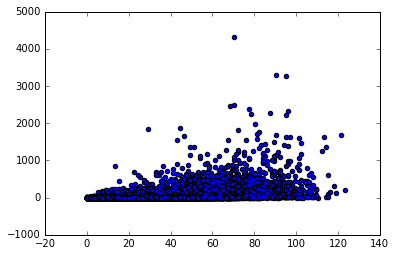

In [58]:
#plt.scatter(people_df['reviewer_months_as_yelper'],people_df['reviewer_review_count'])

In [99]:
people_df.describe()

,reviewer_average_stars,reviewer_fans,reviewer_review_count,reviewer_funny_votes,reviewer_useful_votes,reviewer_cool_votes,reviewer_total_votes,reviewer_num_friends,reviewer_years_elite,reviewer_currently_elite,reviewer_num_compliments,reviewer_months_as_yelper,reviewer_reviews_per_month
count,16518.000000,16518.000000,16518.000000,16518,16518,16518,16518,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000
mean,3.709490,2.286233,45.338419,0,0,0,0,8.182347,0.359789,0.059995,34.964160,38.002388,1.038333
std,0.902253,18.212466,140.627383,0,0,0,0,55.806071,1.199553,0.237485,497.544092,21.942699,2.461923
min,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.229984,0.000000
25%,3.330000,0.000000,3.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,20.271463,0.110379
50%,3.820000,0.000000,8.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,36.238937,0.284555
75%,4.250000,1.000000,26.000000,0,0,0,0,3.000000,0.000000,0.000000,3.000000,52.239266,0.845469
max,5.000000,1075.000000,4323.000000,0,0,0,0,2720.000000,11.000000,1.000000,41095.000000,123.238670,64.423460


In [102]:
(people_df['reviewer_num_friends']>0).sum()

7955

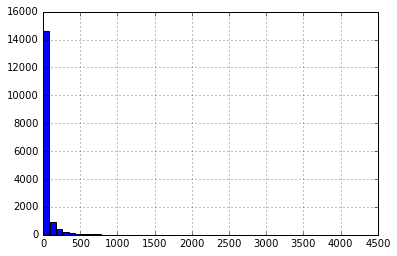

In [95]:
people_df['reviewer_review_count'].hist(bins=50)

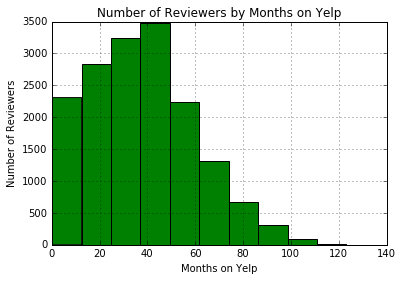

In [72]:
months_yelper = people_df['reviewer_months_as_yelper'].hist(color='green') #A lot of new yelpers!
months_yelper.set_xlabel('Months on Yelp')
months_yelper.set_ylabel('Number of Reviewers')
months_yelper.set_title('Number of Reviewers by Months on Yelp')

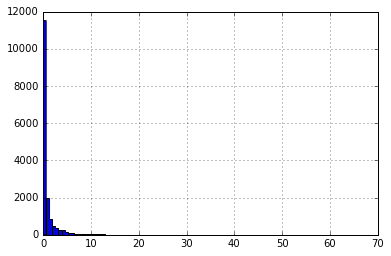

In [62]:
people_df['reviewer_reviews_per_month'].hist(bins=100) #Most people have little activity on the service

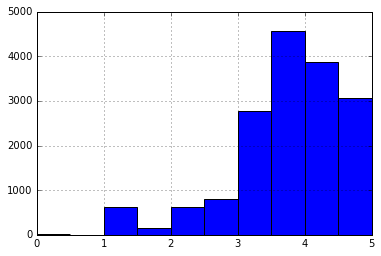

In [63]:
people_df['reviewer_average_stars'].hist() #Similar trend to restaurant ratings; mostly above average to great reviews

In [64]:
float(people_df['reviewer_currently_elite'].sum())/float(len(people_df)) #Six percent of people are elite

0.0599951567986439

### Step 4: Analyze review trends

In [65]:
reviews_df.head()

,review_date,review_id,review_stars,review_text,review_funny_votes,review_useful_votes,review_cool_votes,review_total_votes,reviewer_id,business_id
0,2010-12-31,5jK4kzMbk5_2uFlW6SBqdQ,4,In the Pineville area and need a quick breakfa...,1,1,1,3,whKpnugMnWTz3UjlrN71yg,Gw5POFxBRoJxN_ZYhk6lgQ
1,2011-07-18,GLBryAnx1thVohzWc1nV_A,5,I came here for the first time and was so happ...,0,0,0,0,4522K1jh68XVpUsPh-5I7A,Gw5POFxBRoJxN_ZYhk6lgQ
2,2011-07-29,EHERBq_z1IdCvU56L32nVQ,4,I would definitely need some bad service for a...,0,0,0,0,FdaMP9RQHCY7WMFPq80LCg,Gw5POFxBRoJxN_ZYhk6lgQ
3,2012-09-19,ZXPMc6Lc4V7nqknsJ13u9A,4,This place is an awesome!\n\nThe bagels are fr...,0,0,0,0,PM2jXrlVzik1jDwwahLJJQ,Gw5POFxBRoJxN_ZYhk6lgQ
4,2012-12-29,DttWnjejrfXUDiZzC0aFAg,3,I have mixed feelings about Bruegger's but I s...,0,0,0,0,naBs2Kg2KClrKcoRgFE2eA,Gw5POFxBRoJxN_ZYhk6lgQ


In [86]:
#reviews_df['review_len']=len(reviews_df['review_text'].str.lower().str.split())
reviews_df['review_len'] = reviews_df['review_text'].str.lower().str.split().str.len()

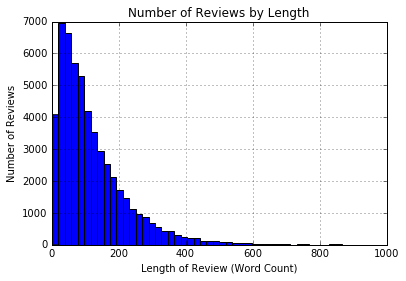

In [93]:
review_lengths = reviews_df['review_len'].hist(bins=50)
review_lengths.set_xlabel('Length of Review (Word Count)')
review_lengths.set_ylabel('Number of Reviews')
review_lengths.set_title('Number of Reviews by Length')

In [90]:
reviews_df.corr()

,review_stars,review_funny_votes,review_useful_votes,review_cool_votes,review_total_votes,review_len
review_stars,1.000000,-0.022148,-0.009675,0.098135,0.020120,-0.129984
review_funny_votes,-0.022148,1.000000,0.593867,0.680825,0.826516,0.234180
review_useful_votes,-0.009675,0.593867,1.000000,0.720706,0.914089,0.368894
review_cool_votes,0.098135,0.680825,0.720706,1.000000,0.893370,0.258550
review_total_votes,0.020120,0.826516,0.914089,0.893370,1.000000,0.339538
review_len,-0.129984,0.234180,0.368894,0.258550,0.339538,1.000000


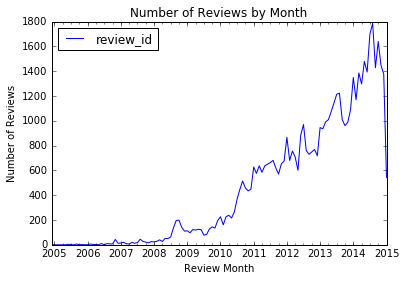

In [70]:
#reviews_df[['review_date','review_id']].groupby('review_date').count().plot(kind='line')
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])
reviews_plot = reviews_df[['review_date','review_id']].set_index('review_date').resample('M','count').plot()
reviews_plot.set_xlabel('Review Month')
reviews_plot.set_ylabel('Number of Reviews')
reviews_plot.set_title('Number of Reviews by Month')

Number of reviews has grown over time

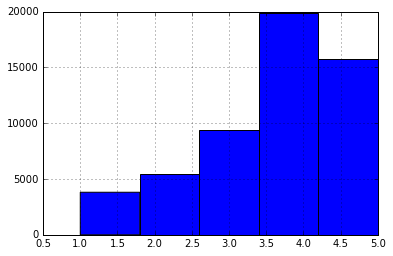

In [68]:
reviews_df['review_stars'].hist(bins=5)